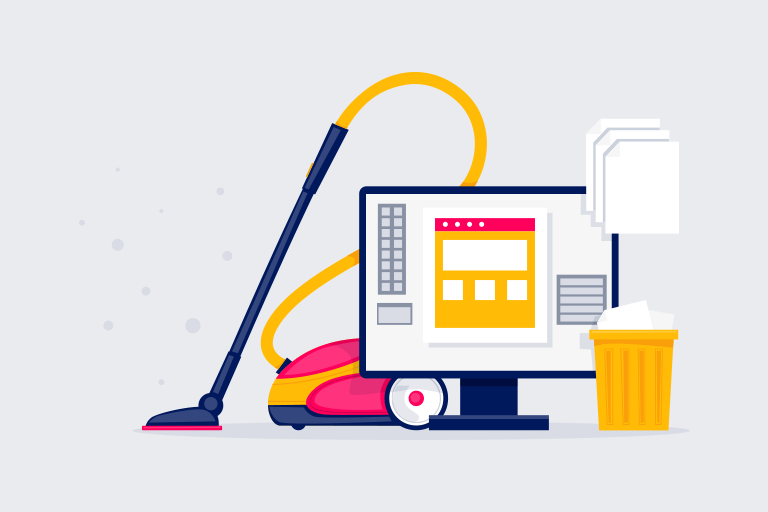

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Data Wrangling
    - Computing the size of DataFrame
    - Summary Statistics for Numerical Columns
    - Check for Missing Data
    - Drop Missing Data
    - Mean / Median Imputation
    - Random Sample Imputation
- Save Dataframe to CSV File

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
cleaned_apps_data = pd.read_csv(r'file2_googleplaystore_cleaned.csv')

In [3]:
# Print top 5 rows in the dataframe.
cleaned_apps_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,Free,0.000000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,Free,0.000000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700000,87510,8.700000,5000000,Free,0.000000,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,50000000,Free,0.000000,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,100000,Free,0.000000,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [4]:
# Print bottom 5 rows in the dataframe.
cleaned_apps_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10835,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,5000,Free,0.000000,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100,Free,0.000000,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,nan,3,9.500000,1000,Free,0.000000,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,nan,1000,Free,0.000000,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19.000000,10000000,Free,0.000000,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,25,7,2018


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA WRANGLING</h2>
</div>

## <span style='color:black'> 1] COMPUTING SIZE OF DATASET </span>

In [5]:
# Print the shape of the DataFrame
print("The shape of data frame:", cleaned_apps_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(cleaned_apps_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(cleaned_apps_data.columns))

The shape of data frame: (10840, 16)
Number of Rows in the dataframe: 10840
Number of Columns in the dataframe: 16


## 2] SUMMARY STATISTICS FOR NUMERICAL COLUMNS

In [6]:
# Summarize the statistics.
cleaned_apps_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
count,10840,10840,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10839,10840.000000,10840,10840,10840,10832,10838,10840.000000,10840.000000,10840.000000
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1377,2831,33,NaN,NaN,NaN
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,2018-08-03,Varies with device,4.1 and up,NaN,NaN,NaN
freq,9,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,842,326,1459,2451,NaN,NaN,NaN
mean,NaN,NaN,4.191757,4.441529e+05,21.506534,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN,15.609041,6.422325,2017.399723
std,NaN,NaN,0.515219,2.927761e+06,22.596021,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN,9.561621,2.578388,1.100914
min,NaN,NaN,1.000000,0.000000e+00,0.010000,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2010.000000
25%,NaN,NaN,4.000000,3.800000e+01,4.900000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,2017.000000
50%,NaN,NaN,4.300000,2.094000e+03,13.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,16.000000,7.000000,2018.000000
75%,NaN,NaN,4.500000,5.477550e+04,30.000000,5.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,24.000000,8.000000,2018.000000


### Summary of the dataset

- The described method will help to see how data has been spread for numerical values.
- We can clearly see the minimum value, mean values, different percentile values, and maximum values.

## 3] CHECK FOR MISSING DATA

In [7]:
# Checking for Null values (NA, NaN)
cleaned_apps_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [8]:
# Checking for Null Values (NA, NaN) in ascending order.
cleaned_apps_data.isna().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [9]:
null_df = pd.DataFrame({'Null Values' : cleaned_apps_data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (cleaned_apps_data.isna().sum().sort_values(ascending=False)) / (cleaned_apps_data.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


In [10]:
null_counts = cleaned_apps_data.isna().sum().sort_values(ascending=False)/len(cleaned_apps_data)
null_counts

Size              0.156365
Rating            0.135978
Current Ver       0.000738
Android Ver       0.000185
Type              0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Day               0.000000
Month             0.000000
Year              0.000000
dtype: float64

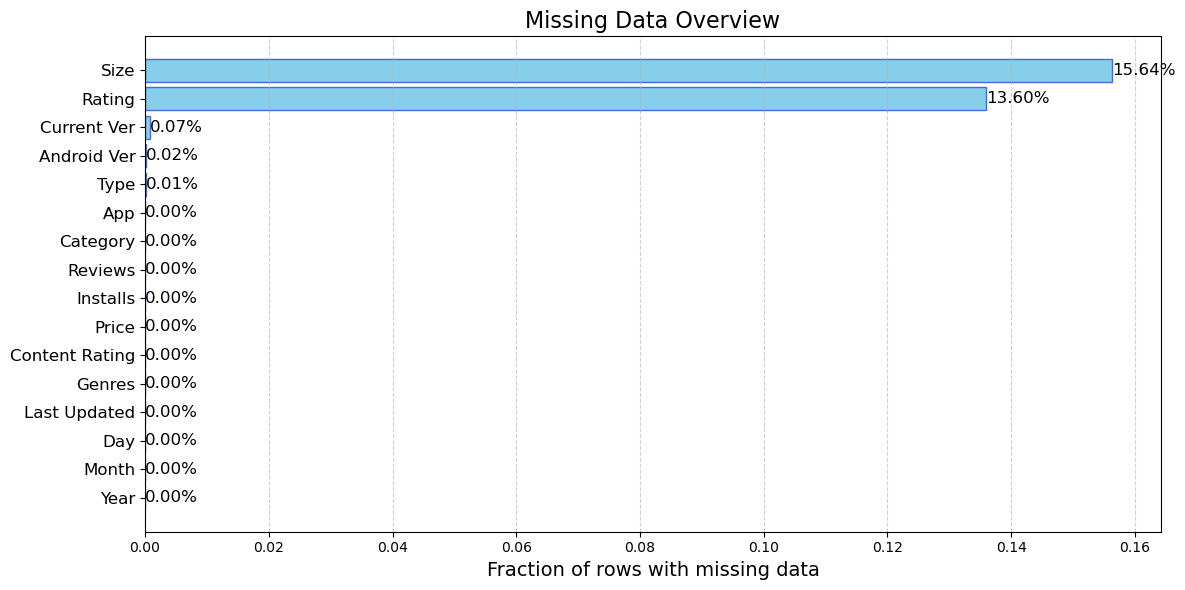

In [11]:
# Calculate the fraction of missing data
null_counts = cleaned_apps_data.isna().sum().sort_values(ascending=False) / len(cleaned_apps_data)

# Create a figure with better aesthetics
plt.figure(figsize=(12, 6))
plt.barh(np.arange(len(null_counts)), null_counts, color='skyblue', edgecolor='royalblue')
plt.yticks(np.arange(len(null_counts)), null_counts.index, fontsize=12)
plt.xlabel('Fraction of rows with missing data', fontsize=14)
plt.title('Missing Data Overview', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis for a cleaner look
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with percentages
for i, val in enumerate(null_counts):
    plt.text(val, i, f'{val:.2%}', va='center', fontsize=12)

plt.tight_layout()  # Ensure all labels are visible

plt.show()

## 4] DROP MISSING DATA

In [12]:
# Create a copy of data.
cleaned_apps_data_copy = cleaned_apps_data.copy()

In [13]:
cols = [var for var in cleaned_apps_data_copy.columns if cleaned_apps_data_copy[var].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [14]:
cleaned_apps_data_copy["Rating"].isnull().mean()*100

13.597785977859777

In [15]:
cleaned_apps_data_copy["Size"].isnull().mean()*100

15.636531365313653

In [16]:
cleaned_apps_data_copy["Type"].isnull().mean()*100

0.00922509225092251

In [17]:
cleaned_apps_data_copy["Current Ver"].isnull().mean()*100

0.07380073800738007

In [18]:
cleaned_apps_data_copy["Android Ver"].isnull().mean()*100

0.01845018450184502

In [19]:
drop_df = cleaned_apps_data_copy[cols].dropna()
drop_df

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.000,Free,1.0.0,4.0.3 and up
1,3.9,14.000,Free,2.0.0,4.0.3 and up
2,4.7,8.700,Free,1.2.4,4.0.3 and up
3,4.5,25.000,Free,Varies with device,4.2 and up
4,4.3,2.800,Free,1.1,4.4 and up
...,...,...,...,...,...
10832,4.8,0.619,Free,0.8,2.2 and up
10833,4.0,2.600,Free,1.0.0,4.1 and up
10835,4.5,53.000,Free,1.48,4.1 and up
10836,5.0,3.600,Free,1.0,4.1 and up


In [20]:
cleaned_apps_data_copy.shape, drop_df.shape

((10840, 16), (7723, 5))

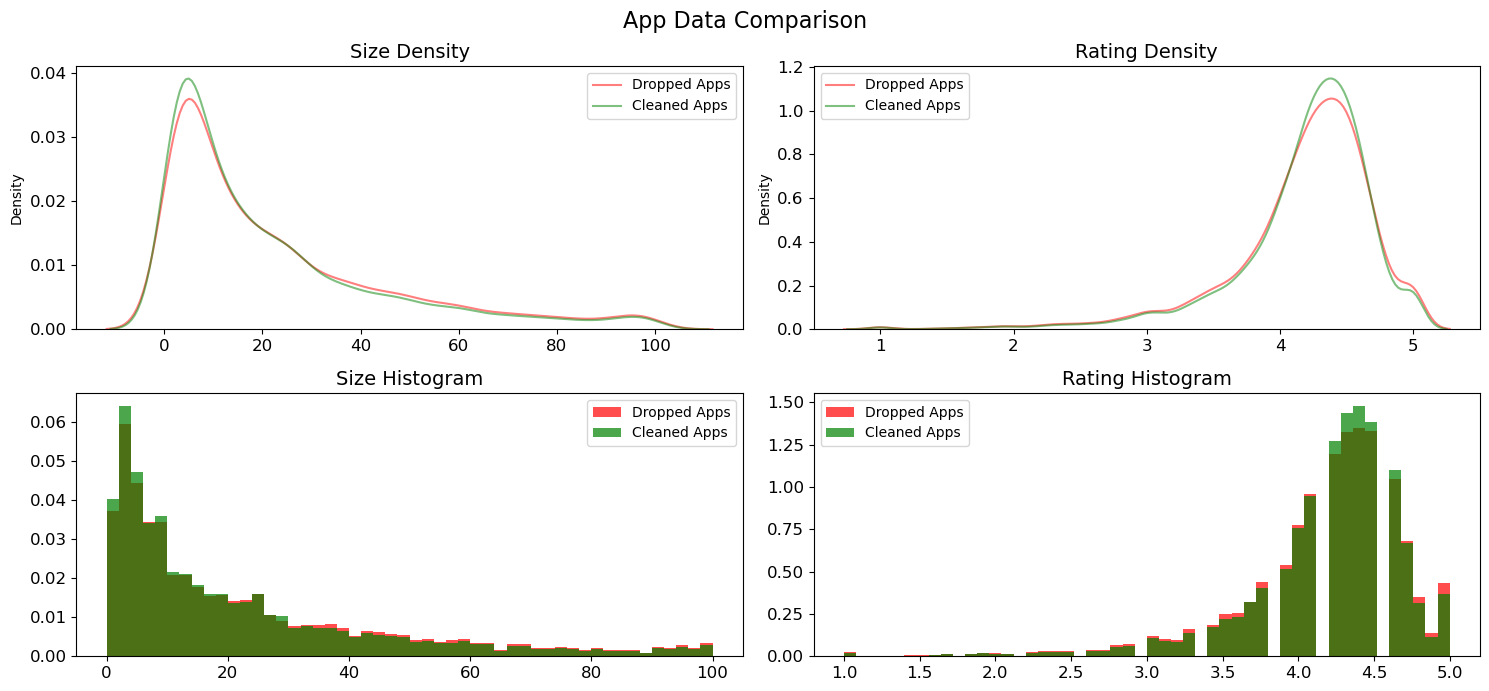

In [21]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

# Plot density plots using seaborn
sns.kdeplot(drop_df['Size'], color='red', ax=axs[0, 0], label='Dropped Apps', alpha=0.5)
sns.kdeplot(cleaned_apps_data_copy['Size'], color='green', ax=axs[0, 0], label='Cleaned Apps', alpha=0.5)
axs[0, 0].set_title('Size Density', fontsize=14)
axs[0, 0].legend()

sns.kdeplot(drop_df['Rating'], color='red', ax=axs[0, 1], label='Dropped Apps', alpha=0.5)
sns.kdeplot(cleaned_apps_data_copy['Rating'], color='green', ax=axs[0, 1], label='Cleaned Apps', alpha=0.5)
axs[0, 1].set_title('Rating Density', fontsize=14)
axs[0, 1].legend()

# Plot histograms
drop_df['Size'].plot.hist(bins=50, ax=axs[1, 0], density=True, color='red', alpha=0.7, label='Dropped Apps')
cleaned_apps_data_copy['Size'].plot.hist(bins=50, ax=axs[1, 0], density=True, color='green', alpha=0.7, label='Cleaned Apps')
axs[1, 0].set_title('Size Histogram', fontsize=14)
axs[1, 0].legend()

drop_df['Rating'].plot.hist(bins=50, ax=axs[1, 1], density=True, color='red', alpha=0.7, label='Dropped Apps')
cleaned_apps_data_copy['Rating'].plot.hist(bins=50, ax=axs[1, 1], density=True, color='green', alpha=0.7, label='Cleaned Apps')
axs[1, 1].set_title('Rating Histogram', fontsize=14)
axs[1, 1].legend()

# Set common labels
for ax in axs.flat:
    ax.set_xlabel('')
    ax.set_ylabel('Density' if ax in axs[0, :] else '')
    ax.tick_params(axis='both', labelsize=12)

# Add a common title
plt.suptitle('App Data Comparison', fontsize=16)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

### Insights

- As we can observe from above plots
 
    - Drop NA Technique is changing our distribution pattern
    - So we reject Drop NA Technique

## 5] MEAN / MEDIAN Imputation

In [22]:
cleaned_apps_data_copy_me_mo = cleaned_apps_data.copy()

In [23]:
cleaned_apps_data_copy_me_mo[cleaned_apps_data_copy_me_mo.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cleaned_apps_data_copy_me_mo[cleaned_apps_data_copy_me_mo['Size'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up,14,7,2018
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,30,7,2018
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,30,7,2018
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,30,7,2018
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device,25,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10712,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,100000,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device,24,7,2018
10724,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up,27,9,2017
10764,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device,23,5,2018
10825,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device,23,3,2018


In [25]:
cleaned_apps_data_copy_me_mo['mean_Size'] = cleaned_apps_data_copy_me_mo['Size'].fillna(cleaned_apps_data_copy_me_mo['Size'].mean())
cleaned_apps_data_copy_me_mo['median_Size'] = cleaned_apps_data_copy_me_mo['Size'].fillna(cleaned_apps_data_copy_me_mo['Size'].median())
cleaned_apps_data_copy_me_mo['mean_Rating'] = cleaned_apps_data_copy_me_mo['Rating'].fillna(cleaned_apps_data_copy_me_mo['Rating'].mean())
cleaned_apps_data_copy_me_mo['median_Rating'] = cleaned_apps_data_copy_me_mo['Rating'].fillna(cleaned_apps_data_copy_me_mo['Rating'].median())

In [26]:
print('Original Size Variance', cleaned_apps_data_copy_me_mo['Size'].var())
print('Size Variance After mean imputation', cleaned_apps_data_copy_me_mo['mean_Size'].var())
print('Size Variance After median imputation', cleaned_apps_data_copy_me_mo['median_Size'].var())

Original Size Variance 510.5801557864865
Size Variance After mean imputation 430.7357638630519
Size Variance After median imputation 440.28217654605237


In [27]:
print('Original Rating Variance', cleaned_apps_data_copy_me_mo['Rating'].var())
print('Rating Variance After mean imputation', cleaned_apps_data_copy_me_mo['mean_Rating'].var())
print('Rating Variance After median imputation', cleaned_apps_data_copy_me_mo['median_Rating'].var())

Original Rating Variance 0.26545047227541496
Rating Variance After mean imputation 0.22935175503821595
Rating Variance After median imputation 0.23072842363353122


### Insights

- Mean will be a good option, as less variance.

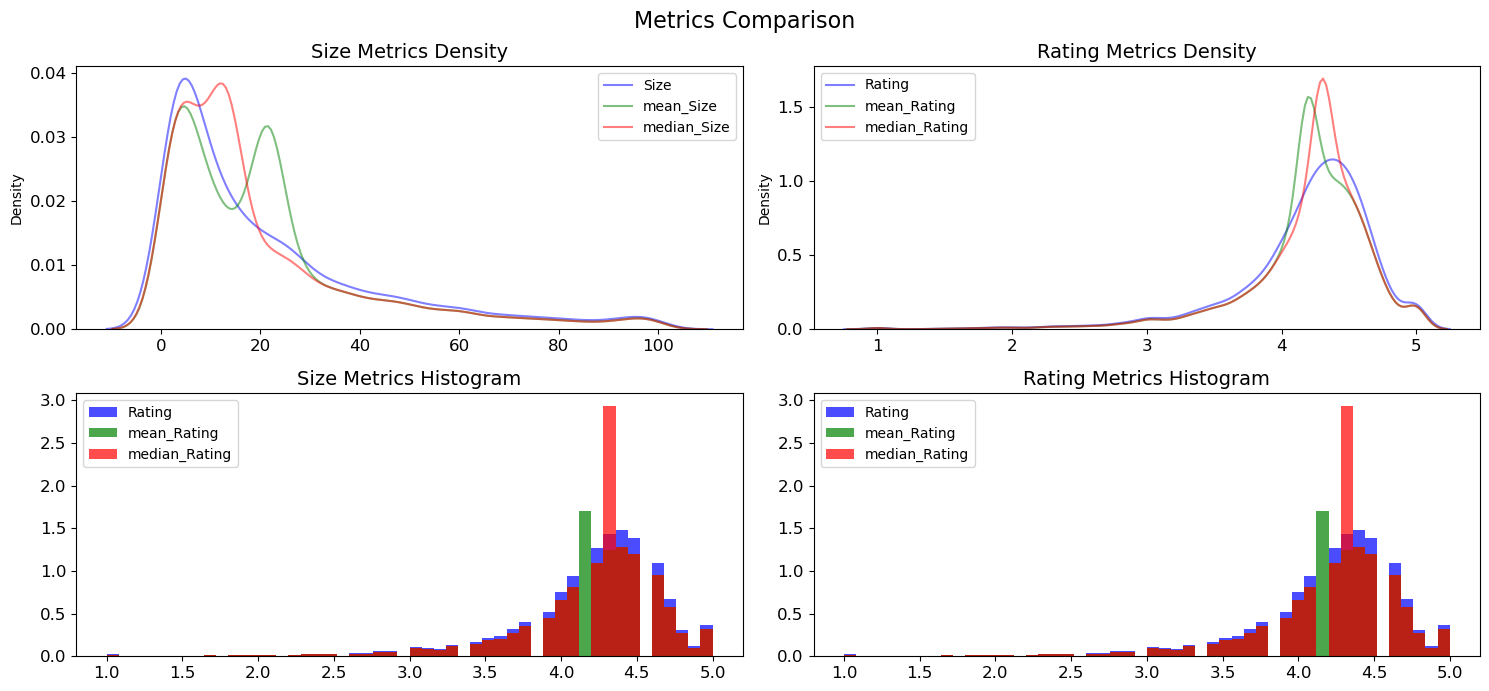

In [28]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

# Plot density plots using seaborn
colors = ['blue', 'green', 'red']
labels = ['Size', 'mean_Size', 'median_Size']
for i in range(3):
    sns.kdeplot(cleaned_apps_data_copy_me_mo[labels[i]], color=colors[i], ax=axs[0, 0], label=labels[i], alpha=0.5)
axs[0, 0].set_title('Size Metrics Density', fontsize=14)
axs[0, 0].legend()

labels = ['Rating', 'mean_Rating', 'median_Rating']
for i in range(3):
    sns.kdeplot(cleaned_apps_data_copy_me_mo[labels[i]], color=colors[i], ax=axs[0, 1], label=labels[i], alpha=0.5)
axs[0, 1].set_title('Rating Metrics Density', fontsize=14)
axs[0, 1].legend()

# Plot histograms
for i in range(3):
    cleaned_apps_data_copy_me_mo[labels[i]].plot.hist(bins=50, ax=axs[1, 0], density=True, color=colors[i], alpha=0.7, label=labels[i])
axs[1, 0].set_title('Size Metrics Histogram', fontsize=14)
axs[1, 0].legend()

for i in range(3):
    cleaned_apps_data_copy_me_mo[labels[i]].plot.hist(bins=50, ax=axs[1, 1], density=True, color=colors[i], alpha=0.7, label=labels[i])
axs[1, 1].set_title('Rating Metrics Histogram', fontsize=14)
axs[1, 1].legend()

# Set common labels
for ax in axs.flat:
    ax.set_xlabel('')
    ax.set_ylabel('Density' if ax in axs[0, :] else '')
    ax.tick_params(axis='both', labelsize=12)

# Add a common title
plt.suptitle('Metrics Comparison', fontsize=16)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

### Insights

- As we can observe from above plots

    - Mean and median imputation Technique is changing our distribution pattern.
    - So we will reject mean and median imputation Technique also.

## 6] RANDOM SAMPLE IMPUTATION

In [29]:
cleaned_apps_data_random = cleaned_apps_data.copy()

In [30]:
cleaned_apps_data_random['Size'].dropna().sample(20)

8334      2.300
623      13.000
5489     96.000
281       8.600
2192      9.500
7819     14.000
4192      0.051
5279      3.800
9304     31.000
1655     74.000
1311     25.000
2447     20.000
10477     8.000
5314      3.000
10619    14.000
963      25.000
7717      3.400
2007     96.000
5775      1.600
9663      5.200
Name: Size, dtype: float64

In [31]:
cleaned_apps_data_random[cleaned_apps_data_random['Size'].isnull()].index

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10646, 10678, 10680, 10706, 10711, 10712, 10724, 10764, 10825,
            10838],
           dtype='int64', length=1695)

In [32]:
cleaned_apps_data_random['Size'].dropna().sample(1695)

3239     15.000
8492      6.400
9054      2.100
10428     8.200
10504    36.000
          ...  
9856      0.079
10673     5.200
4580     40.000
10215     1.800
2308     23.000
Name: Size, Length: 1695, dtype: float64

In [33]:
def Random_Sample_imputation(feature):
    random_sample=cleaned_apps_data_random[feature].dropna().sample(cleaned_apps_data_random[feature].isnull().sum())               
    random_sample.index=cleaned_apps_data_random[cleaned_apps_data_random[feature].isnull()].index
    cleaned_apps_data_random.loc[cleaned_apps_data_random[feature].isnull(),feature]=random_sample

In [34]:
for col in cleaned_apps_data_random:
    Random_Sample_imputation(col)

In [35]:
print('Original Size Variance', cleaned_apps_data['Size'].var())
print('Size Variance After Random imputation', cleaned_apps_data_random['Size'].var())

Original Size Variance 510.5801557864865
Size Variance After Random imputation 509.0409078261808


In [36]:
print('Original Size Variance', cleaned_apps_data['Rating'].var())
print('Size Variance After Rating imputation', cleaned_apps_data_random['Rating'].var())

Original Size Variance 0.26545047227541496
Size Variance After Rating imputation 0.26685635333865826


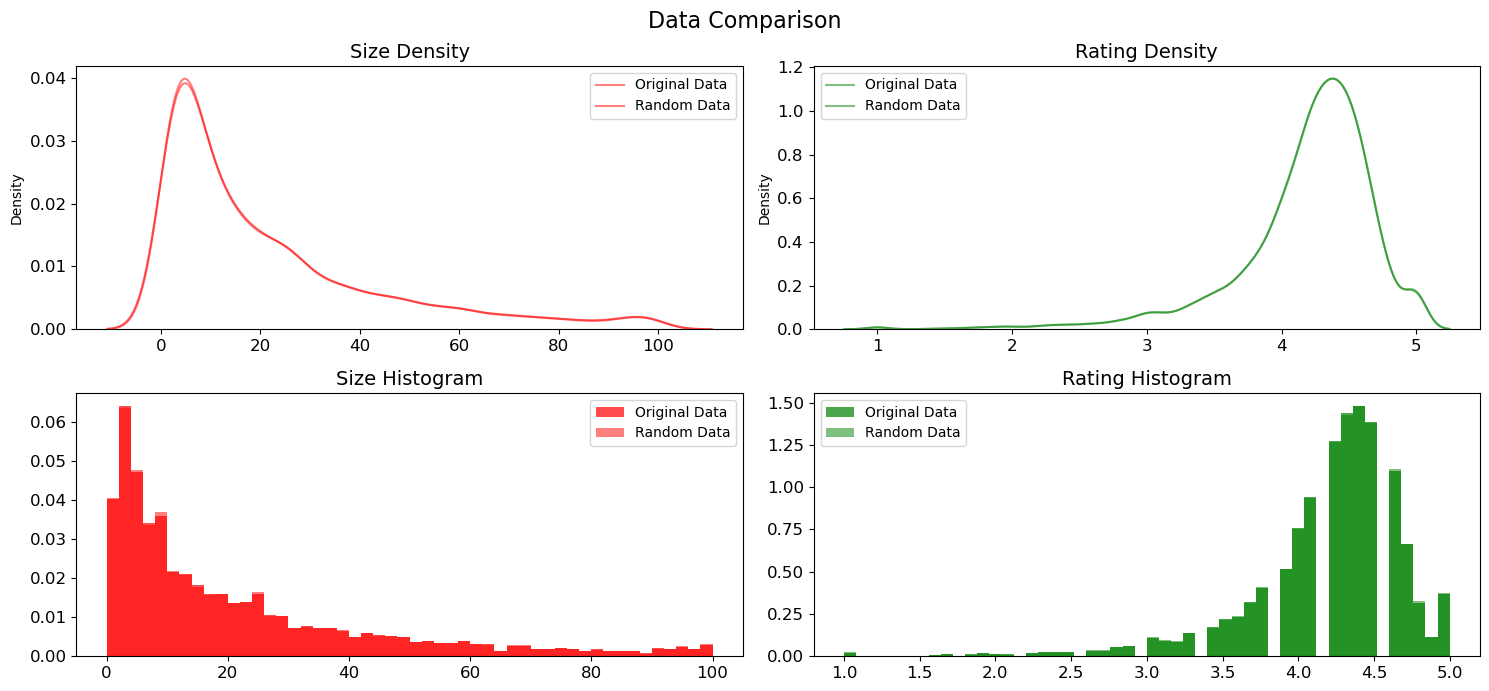

In [37]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

# Plot density plots using seaborn
colors = ['red', 'green']
labels = ['Size', 'Rating']
for i in range(2):
    sns.kdeplot(cleaned_apps_data[labels[i]], color=colors[i], ax=axs[0, i], label='Original Data', alpha=0.5)
    sns.kdeplot(cleaned_apps_data_random[labels[i]], color=colors[i], ax=axs[0, i], label='Random Data', alpha=0.5)
    axs[0, i].set_title(f'{labels[i]} Density', fontsize=14)
    axs[0, i].legend()

# Plot histograms
for i in range(2):
    cleaned_apps_data[labels[i]].plot.hist(bins=50, ax=axs[1, i], density=True, color=colors[i], alpha=0.7, label='Original Data')
    cleaned_apps_data_random[labels[i]].plot.hist(bins=50, ax=axs[1, i], density=True, color=colors[i], alpha=0.5, label='Random Data')
    axs[1, i].set_title(f'{labels[i]} Histogram', fontsize=14)
    axs[1, i].legend()

# Set common labels
for ax in axs.flat:
    ax.set_xlabel('')
    ax.set_ylabel('Density' if ax in axs[0, :] else '')
    ax.tick_params(axis='both', labelsize=12)

# Add a common title
plt.suptitle('Data Comparison', fontsize=16)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

In [38]:
null_df = pd.DataFrame({'Null Values' : cleaned_apps_data_random.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (cleaned_apps_data_random.isna().sum().sort_values(ascending=False)) / (cleaned_apps_data_random.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


### Insights

- As we can observe from above plots

    - Random Sample imputation Technique has no impact on distribution pattern.
    - So we will accept Random Sample imputation Technique .

In [39]:
num_features=[col for col in cleaned_apps_data_random.columns if cleaned_apps_data_random[col].dtype!='O']
num_df = cleaned_apps_data_random[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">SAVING DATAFRAME TO CSV FILE</h2>
</div>

In [40]:
cleaned_apps_data_random.to_csv('file3_googleplaystore_preprocessed.csv', index = False)